In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##KLeach 3/28/2024

# Path to dataset
enrollment_path = '../data/enrollment_training_data.xlsx'

# Load the data into Pandas DataFrames
enrollment_data = pd.read_excel(enrollment_path)

# Display the first few rows of the DataFrames to verify
enrollment_data.head(1000)

,YEAR,COUNTY_DISTRICT_CODE,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME,GRADE,TOTAL_ENROLLMENT,COHORT_SURVIVAL_RATE,RESIDENT_ESTIMATE,ENROLLMENT_RESIDENT_PROPORTION
0,2010,39141,SPRINGFIELD R-XII,1050,CENTRAL HIGH,6,41,1.000000,29567.0,0.001387
1,2010,39141,SPRINGFIELD R-XII,1050,CENTRAL HIGH,7,43,1.048780,29567.0,0.001454
2,2010,39141,SPRINGFIELD R-XII,1050,CENTRAL HIGH,8,40,1.025641,29567.0,0.001353
3,2010,39141,SPRINGFIELD R-XII,1050,CENTRAL HIGH,9,472,1.145631,29567.0,0.015964
4,2010,39141,SPRINGFIELD R-XII,1050,CENTRAL HIGH,10,356,0.887781,29567.0,0.012040
...,...,...,...,...,...,...,...,...,...,...
995,2015,39141,SPRINGFIELD R-XII,3140,REED MIDDLE,0-12,603,1.065371,29954.0,0.020131
996,2016,39141,SPRINGFIELD R-XII,3140,REED MIDDLE,6,215,0.964126,29822.0,0.007209
997,2016,39141,SPRINGFIELD R-XII,3140,REED MIDDLE,7,218,1.117949,29822.0,0.007310
998,2016,39141,SPRINGFIELD R-XII,3140,REED MIDDLE,8,193,1.043243,29822.0,0.006472


In [2]:
# Summary statistics
print(enrollment_data.describe())

              YEAR  COUNTY_DISTRICT_CODE  SCHOOL_CODE  TOTAL_ENROLLMENT  \
count  5068.000000                5068.0  5068.000000       5068.000000   
mean   2016.458169               39141.0  3961.314128        201.197119   
std       4.011876                   0.0  1052.381545        273.500657   
min    2010.000000               39141.0  1050.000000         14.000000   
25%    2013.000000               39141.0  4060.000000         47.000000   
50%    2016.000000               39141.0  4320.000000         75.000000   
75%    2020.000000               39141.0  4600.000000        280.000000   
max    2023.000000               39141.0  4840.000000       2031.000000   

       COHORT_SURVIVAL_RATE  RESIDENT_ESTIMATE  ENROLLMENT_RESIDENT_PROPORTION  
count           5055.000000        4356.000000                     4356.000000  
mean               1.012135       30414.719008                        0.006629  
std                0.185675        1690.335166                        0.008973  


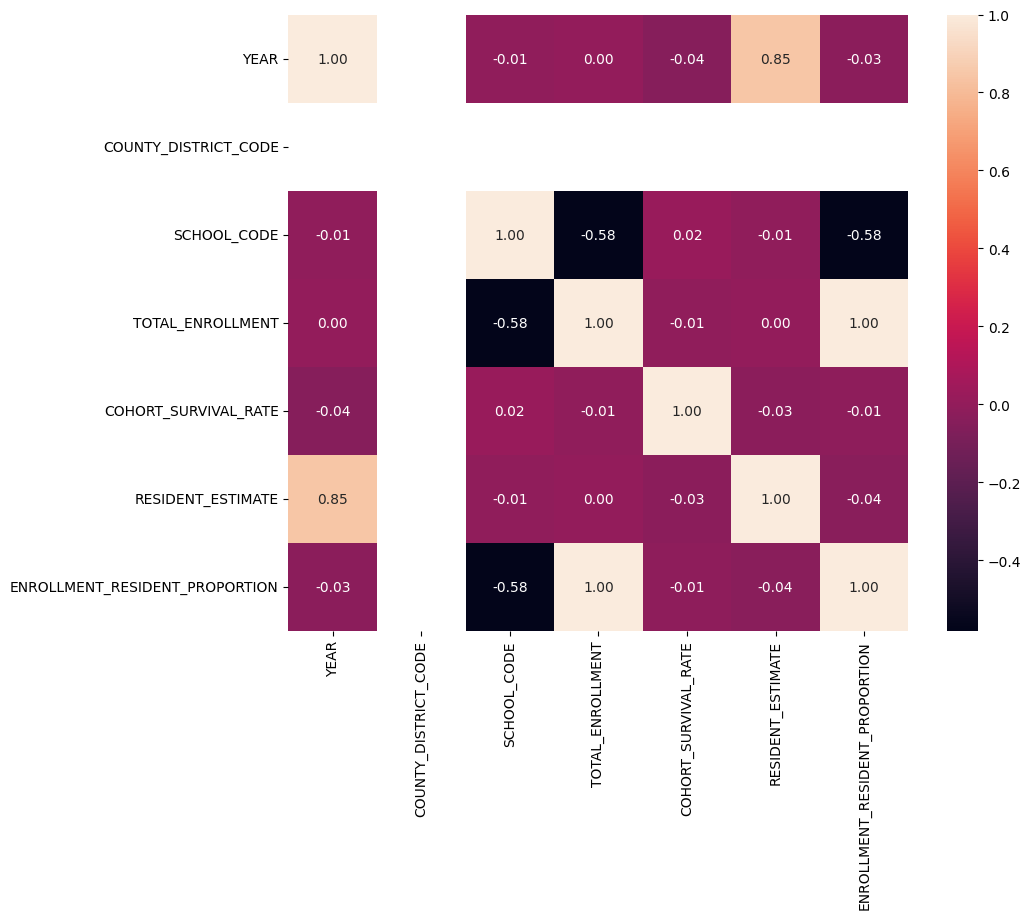

In [3]:
# Select only numeric columns for correlation calculation
numeric_data = enrollment_data.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

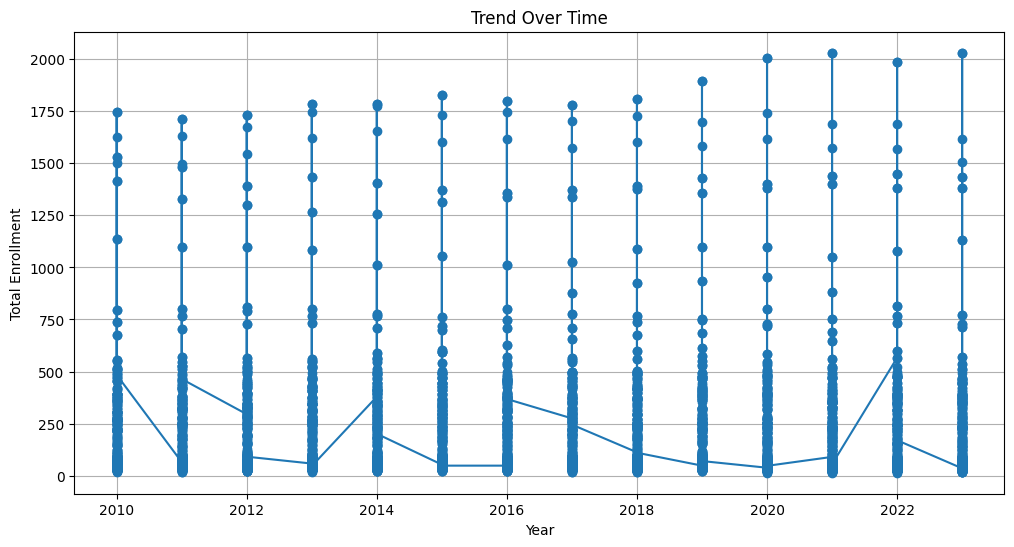

In [4]:
# Ensure the data is sorted by year
enrollment_data_sorted = enrollment_data.sort_values('YEAR')  # Replace 'YearColumn' with your actual year column name

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(enrollment_data_sorted['YEAR'], enrollment_data_sorted['TOTAL_ENROLLMENT'], marker='o')  # Replace 'MetricColumn' with your metric column name
plt.title('Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')  # Replace 'Metric' with the actual metric to analyze
plt.grid(True)
plt.show()

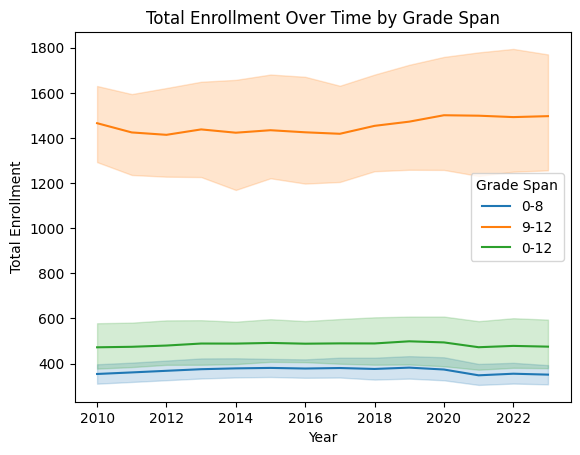

In [5]:
# First, filter the data to include only the categories of interest
filtered_data = enrollment_data[enrollment_data['GRADE'].isin(['0-8', '0-12', '9-12'])]
sns.lineplot(data=filtered_data, x='YEAR', y='TOTAL_ENROLLMENT', hue='GRADE')
plt.title('Total Enrollment Over Time by Grade Span')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.legend(title='Grade Span')
plt.show()

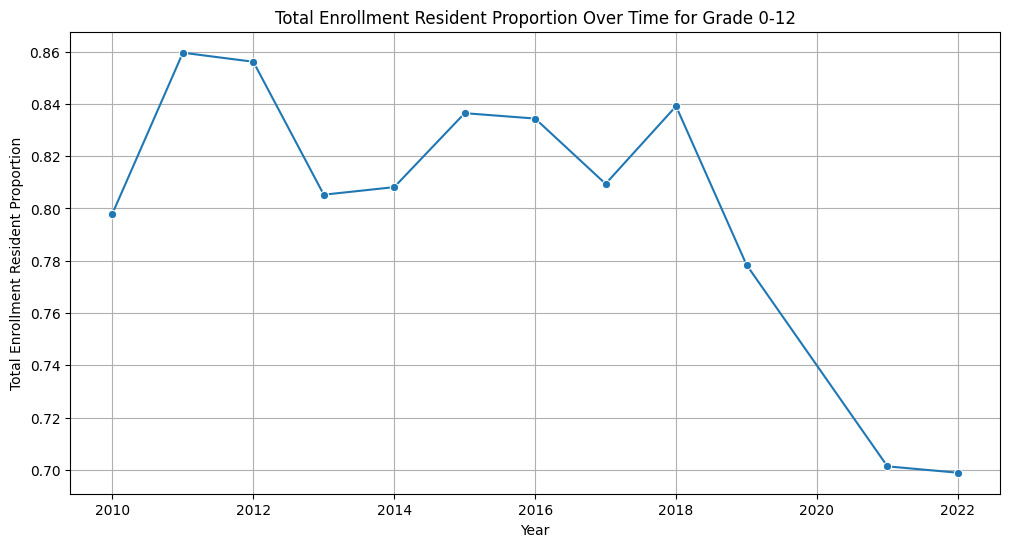

In [6]:

# Filter out the year 2020 and the '0-12' grade category
filtered_data = enrollment_data[
    (enrollment_data['GRADE'] == '0-12') & 
    (~enrollment_data['YEAR'].isin([2020, 2023]))
]
# Aggregate the data by 'YEAR' and sum the 'ENROLLMENT_RESIDENT_PROPORTION' for each year
aggregated_data = filtered_data.groupby('YEAR')['ENROLLMENT_RESIDENT_PROPORTION'].sum().reset_index()

# Plot the time series with the aggregated data
plt.figure(figsize=(12, 6))
sns.lineplot(data=aggregated_data, x='YEAR', y='ENROLLMENT_RESIDENT_PROPORTION', marker='o')
plt.title('Total Enrollment Resident Proportion Over Time for Grade 0-12')
plt.xlabel('Year')
plt.ylabel('Total Enrollment Resident Proportion')
plt.grid(True)
plt.show()

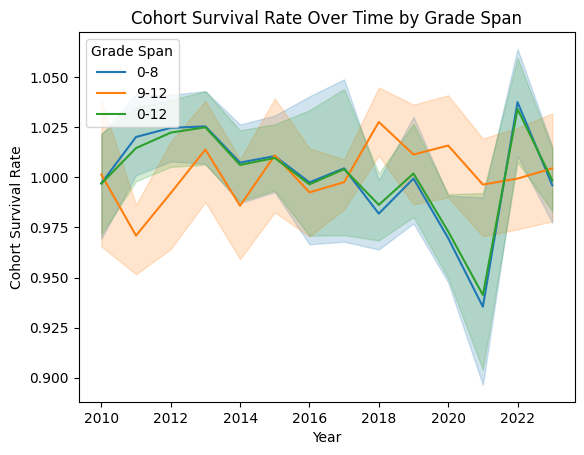

In [7]:
# First, filter the data to include only the categories of interest
filtered_data = enrollment_data[enrollment_data['GRADE'].isin(['0-8', '0-12', '9-12'])]
sns.lineplot(data=filtered_data, x='YEAR', y='COHORT_SURVIVAL_RATE', hue='GRADE')
plt.title('Cohort Survival Rate Over Time by Grade Span')
plt.xlabel('Year')
plt.ylabel('Cohort Survival Rate')
plt.legend(title='Grade Span')
plt.show()

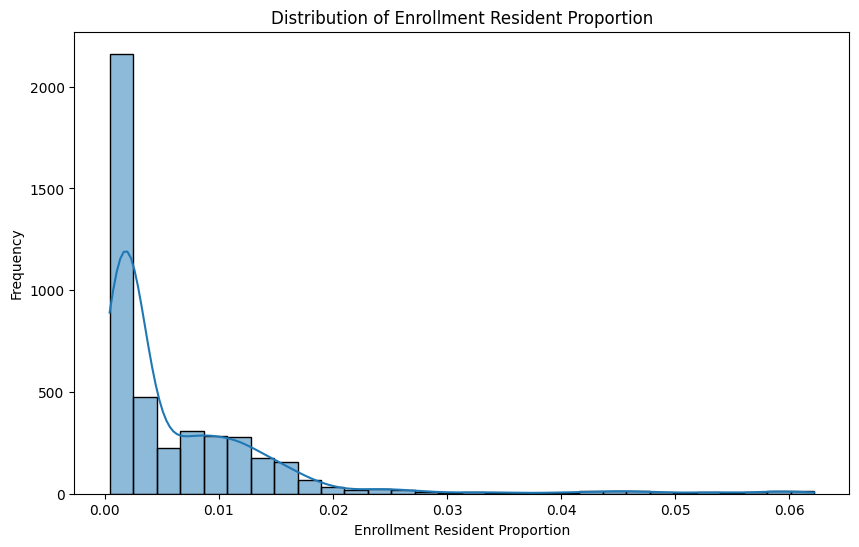

In [8]:
# Plot a histogram to see the distribution
plt.figure(figsize=(10, 6))
sns.histplot(enrollment_data['ENROLLMENT_RESIDENT_PROPORTION'].dropna(), kde=True, bins=30)  # Adjust bins if necessary
plt.title('Distribution of Enrollment Resident Proportion')
plt.xlabel('Enrollment Resident Proportion')
plt.ylabel('Frequency')
plt.show()

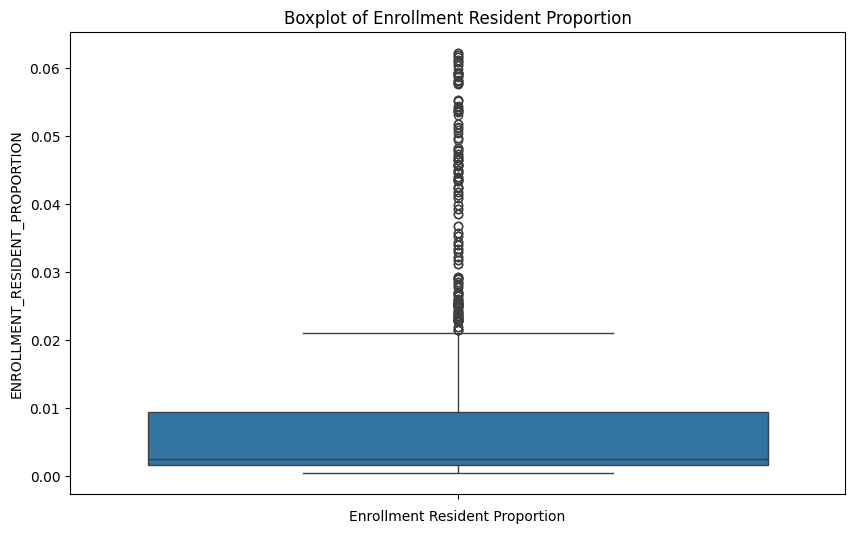

In [9]:
# Plot a boxplot to view the distribution and identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(enrollment_data['ENROLLMENT_RESIDENT_PROPORTION'].dropna())
plt.title('Boxplot of Enrollment Resident Proportion')
plt.xlabel('Enrollment Resident Proportion')
plt.show()


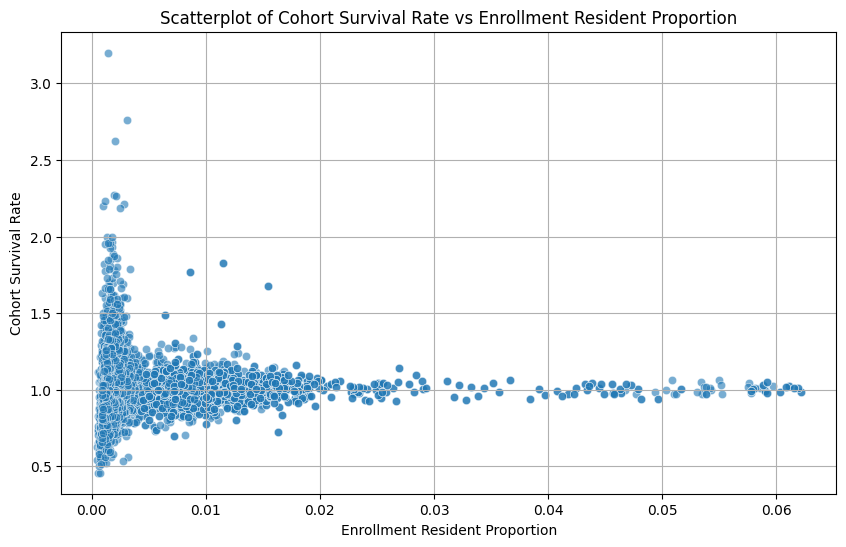

In [10]:
# Make sure both columns are numeric and there are no NaN values for the plot
enrollment_data.dropna(subset=['COHORT_SURVIVAL_RATE', 'ENROLLMENT_RESIDENT_PROPORTION'], inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=enrollment_data,
    x='ENROLLMENT_RESIDENT_PROPORTION', 
    y='COHORT_SURVIVAL_RATE', 
    alpha=0.6  # This sets the transparency of the points
)
plt.title('Scatterplot of Cohort Survival Rate vs Enrollment Resident Proportion')
plt.xlabel('Enrollment Resident Proportion')
plt.ylabel('Cohort Survival Rate')
plt.grid(True)
plt.show()

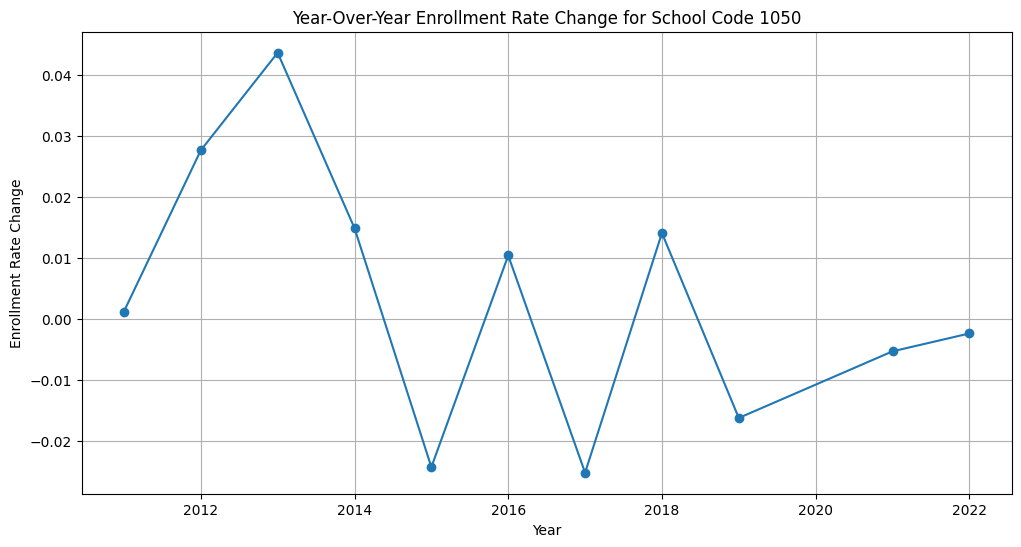

In [11]:
# Filter the DataFrame for the '0-12' grade
grade_0_12_data = enrollment_data[enrollment_data['GRADE'] == '0-12']

# Sort the DataFrame
grade_0_12_sorted = grade_0_12_data.sort_values(['SCHOOL_CODE', 'YEAR'])

# Calculate the year-over-year percentage change for each school's total enrollment
grade_0_12_sorted['ENROLLMENT_RATE_CHANGE'] = grade_0_12_sorted.groupby('SCHOOL_CODE')['TOTAL_ENROLLMENT'].pct_change()

# To visualize the acceleration or deceleration in trends, look at individual schools
school_code_example = 1050  # Replace with actual school code
school_data = grade_0_12_sorted[grade_0_12_sorted['SCHOOL_CODE'] == school_code_example]

plt.figure(figsize=(12, 6))
plt.plot(school_data['YEAR'], school_data['ENROLLMENT_RATE_CHANGE'], marker='o')
plt.title(f'Year-Over-Year Enrollment Rate Change for School Code {school_code_example}')
plt.xlabel('Year')
plt.ylabel('Enrollment Rate Change')
plt.grid(True)
plt.show()

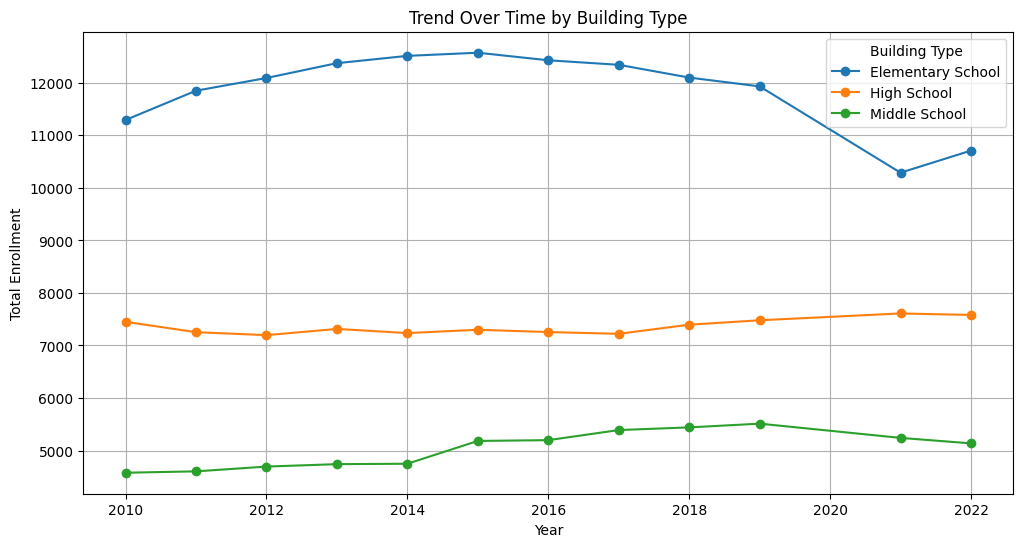

In [12]:
# Extract building type based on the SCHOOL_CODE
# This lambda function assumes that SCHOOL_CODE is a string; if it's numeric, it would need to be converted first
enrollment_data['Building_Type'] = enrollment_data['SCHOOL_CODE'].apply(lambda x: 'High School' if str(x).startswith('1') 
                                                                        else ('Middle School' if str(x).startswith('3') 
                                                                        else 'Elementary School'))

# Filter out the rows where Grade is '0-12' to get the total enrollment
total_enrollment_by_year = enrollment_data[enrollment_data['GRADE'] == '0-12']

# Group by Year and Building_Type, then sum the Total Enrollment
total_enrollment_by_year = total_enrollment_by_year.groupby(['YEAR', 'Building_Type'])['TOTAL_ENROLLMENT'].sum().reset_index()

# Plot the time series by building type
plt.figure(figsize=(12, 6))

# Plot each building type
for building_type in total_enrollment_by_year['Building_Type'].unique():
    subset = total_enrollment_by_year[total_enrollment_by_year['Building_Type'] == building_type]
    plt.plot(subset['YEAR'], subset['TOTAL_ENROLLMENT'], marker='o', label=building_type)

plt.title('Trend Over Time by Building Type')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.legend(title='Building Type')
plt.grid(True)
plt.show()


C:\Users\kaleach\AppData\Local\Temp\ipykernel_30932\1436757429.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade_0_12_data['Building_Type'] = grade_0_12_data['SCHOOL_CODE'].apply(determine_building_type)


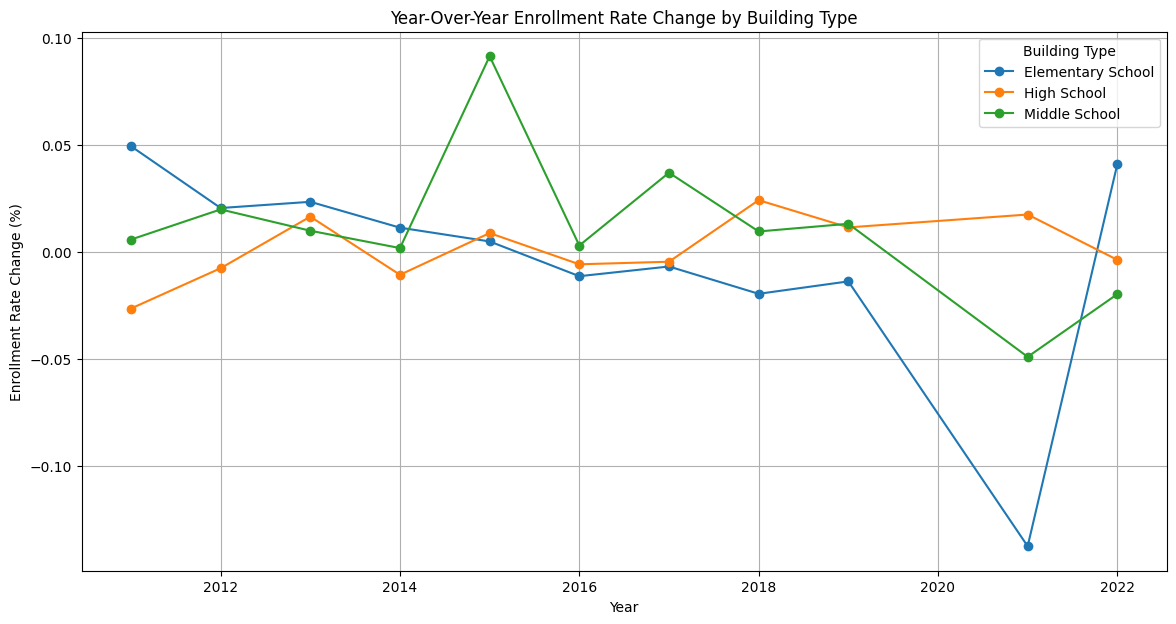

In [13]:

# Define a function to determine the building type based on the SCHOOL_CODE
def determine_building_type(school_code):
    school_code = str(school_code)
    if school_code.startswith('1'):
        return 'High School'
    elif school_code.startswith('3'):
        return 'Middle School'
    elif school_code.startswith('4'):
        return 'Elementary School'
    else:
        return 'Other'

# Apply the function to create a new 'Building_Type' column
grade_0_12_data['Building_Type'] = grade_0_12_data['SCHOOL_CODE'].apply(determine_building_type)

# Group by 'YEAR' and 'Building_Type', then sum the 'TOTAL_ENROLLMENT'
building_type_enrollment = grade_0_12_data.groupby(['YEAR', 'Building_Type'])['TOTAL_ENROLLMENT'].sum().reset_index()

# Calculate the year-over-year percentage change for each building type
building_type_enrollment['ENROLLMENT_RATE_CHANGE'] = building_type_enrollment.groupby('Building_Type')['TOTAL_ENROLLMENT'].pct_change()

# Plot the year-over-year percentage change for each building type
plt.figure(figsize=(14, 7))

for building_type in building_type_enrollment['Building_Type'].unique():
    subset = building_type_enrollment[building_type_enrollment['Building_Type'] == building_type]
    plt.plot(subset['YEAR'], subset['ENROLLMENT_RATE_CHANGE'], marker='o', label=building_type)

plt.title('Year-Over-Year Enrollment Rate Change by Building Type')
plt.xlabel('Year')
plt.ylabel('Enrollment Rate Change (%)')
plt.legend(title='Building Type')
plt.grid(True)
plt.show()



C:\Users\kaleach\AppData\Local\Temp\ipykernel_30932\2905950279.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['COHORT_SURVIVAL_RATE', 'ENROLLMENT_RESIDENT_PROPORTION'], inplace=True)


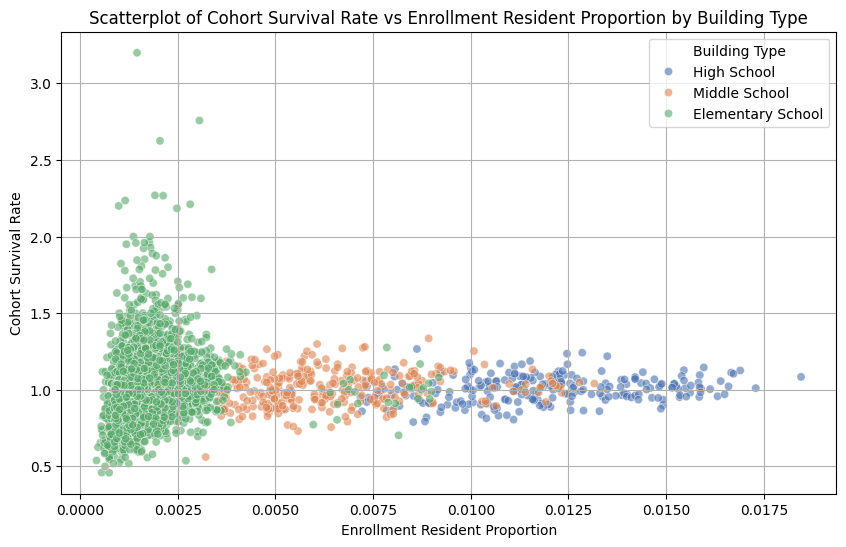

In [15]:

# Determine building type based on the SCHOOL_CODE
enrollment_data['Building_Type'] = enrollment_data['SCHOOL_CODE'].apply(
    lambda x: 'High School' if str(x).startswith('1') else 
              ('Middle School' if str(x).startswith('3') else 
               ('Elementary School' if str(x).startswith('4') else 'Other'))
)

# Remove the rows where 'GRADE' is one of the grade spans
filtered_data = enrollment_data[~enrollment_data['GRADE'].isin(['0-8', '9-12', '0-12'])]

# Drop any rows with NaN values in 'COHORT_SURVIVAL_RATE' or 'ENROLLMENT_RESIDENT_PROPORTION'
filtered_data.dropna(subset=['COHORT_SURVIVAL_RATE', 'ENROLLMENT_RESIDENT_PROPORTION'], inplace=True)

# Create the scatterplot with color-coding by 'Building_Type'
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,
    x='ENROLLMENT_RESIDENT_PROPORTION', 
    y='COHORT_SURVIVAL_RATE',
    hue='Building_Type',  # Color code by Building Type
    palette='deep',  # You can choose a palette that suits your preference
    alpha=0.6  # Set the transparency of the points
)
plt.title('Scatterplot of Cohort Survival Rate vs Enrollment Resident Proportion by Building Type')
plt.xlabel('Enrollment Resident Proportion')
plt.ylabel('Cohort Survival Rate')
plt.legend(title='Building Type')
plt.grid(True)
plt.show()
